# Data perparation & transformantion

I prepare a movie comment dataset for the lab 

In [1]:
categories = ['negative', 'positive']

In [2]:
from helpers import data_mining_helpers as dmh

In [3]:
import pandas as pd
X = pd.read_csv('commentData.csv')

In [4]:
X.shape

(2000, 2)

In [5]:
X[0:2]

comment  type
0  plot : two teen couples go to a church party ,...     0
1  the happy bastard's quick movie review \ndamn ...     0

In [6]:
print("\n".join(X.iloc[0].comment.split("\n")))

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [7]:
for t in X['comment'][:3]:
    print(t)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [8]:
#add category to dataframe
def get_type(n):
    return categories[1] if n else categories[0]
X['category'] = X.type.apply(get_type)

here I select the movie comment with horro in it, because I am interest in comments of horro movie, and the results were quit even.

In [9]:
import re
res = []
for txt in X['comment']:
     res.append(re.search('horro', txt, re.IGNORECASE) != None)
X.loc[res].category.value_counts()

positive    130
negative    119
Name: category, dtype: int64

# checking for missing value and duplicates


In [10]:
X.isnull()

comment   type  category
0       False  False     False
1       False  False     False
2       False  False     False
3       False  False     False
4       False  False     False
...       ...    ...       ...
1995    False  False     False
1996    False  False     False
1997    False  False     False
1998    False  False     False
1999    False  False     False

[2000 rows x 3 columns]

In [11]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                                type  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

now we check for duplicates data

In [12]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [13]:
sum(X.duplicated())

0

# Data preprocessing

In [14]:
X_sample = X.sample(n=1000) #random state

In [15]:
X_sample[0:10]

comment  type  category
377   say , tell me if you've seen this before : a c...     0  negative
1153  jack nicholson has a funny way of playing char...     1  positive
70    it rocks-actually , lots of rocks fly at us or...     0  negative
1468  when casting the key part of the voice of mose...     1  positive
1684  there seem to be two reactions to dark city . ...     1  positive
1967  is it just me , or have disney films gradually...     1  positive
1674  look back at all the times in your life when t...     1  positive
1739  you know you're in for a truly different cinem...     1  positive
1926  billy bob thornton , who had a sudden rise to ...     1  positive
952    " alcohol and drugs = bad . \nnot alcohol and...     0  negative

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Category distribution'}>

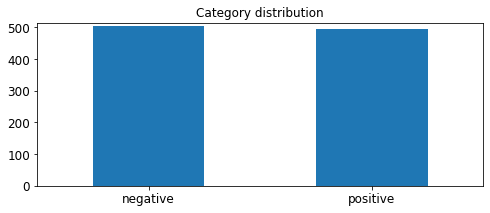

In [17]:
# Answer here
upper_bound = max(X_sample.category.value_counts()) + 10



# plot barchart for X_sample
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [18]:
# Answer here

sample = X_sample.category.value_counts()
total = X.category.value_counts()

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x = categories,
    y = total,
    name = 'Toatl',
    marker_color = 'darkcyan'
))

fig.add_trace(go.Bar(
    x = categories,
    y = sample,
    name = 'Sample',
    marker_color='chocolate'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# remove punctuation and stop word

first I remove punctuation and numeric data from our comments since they have little to do with  classification

In [19]:
import string

def clean(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    return text

X.comment = X.comment.apply(clean)
X.iloc[0].comment

'plot  two teen couples go to a church party  drink and then drive  they get into an accident  one of the guys dies  but his girlfriend continues to see him in her life  and has nightmares  whats the deal  watch the movie and  sorta  find out    critique  a mindfuck movie for the teen generation that touches on a very cool idea  but presents it in a very bad package  which is what makes this review an even harder one to write  since i generally applaud films which attempt to break the mold  mess with your head and such  lost highway  memento   but there are good and bad ways of making all types of films  and these folks just didnt snag this one correctly  they seem to have taken this pretty neat concept  but executed it terribly  so what are the problems with the movie  well  its main problem is that its simply too jumbled  it starts off  normal  but then downshifts into this  fantasy  world in which you  as an audience member  have no idea whats going on  there are dreams  there are c

secondly I remove stopwords we can find it is more consice for our model to learn 

In [20]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

def remove_stopword(text):
     return " ".join([word for word in text.split() if word not in cachedStopWords])


X.comment = X.comment.apply(remove_stopword)
X.iloc[0].comment

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like a

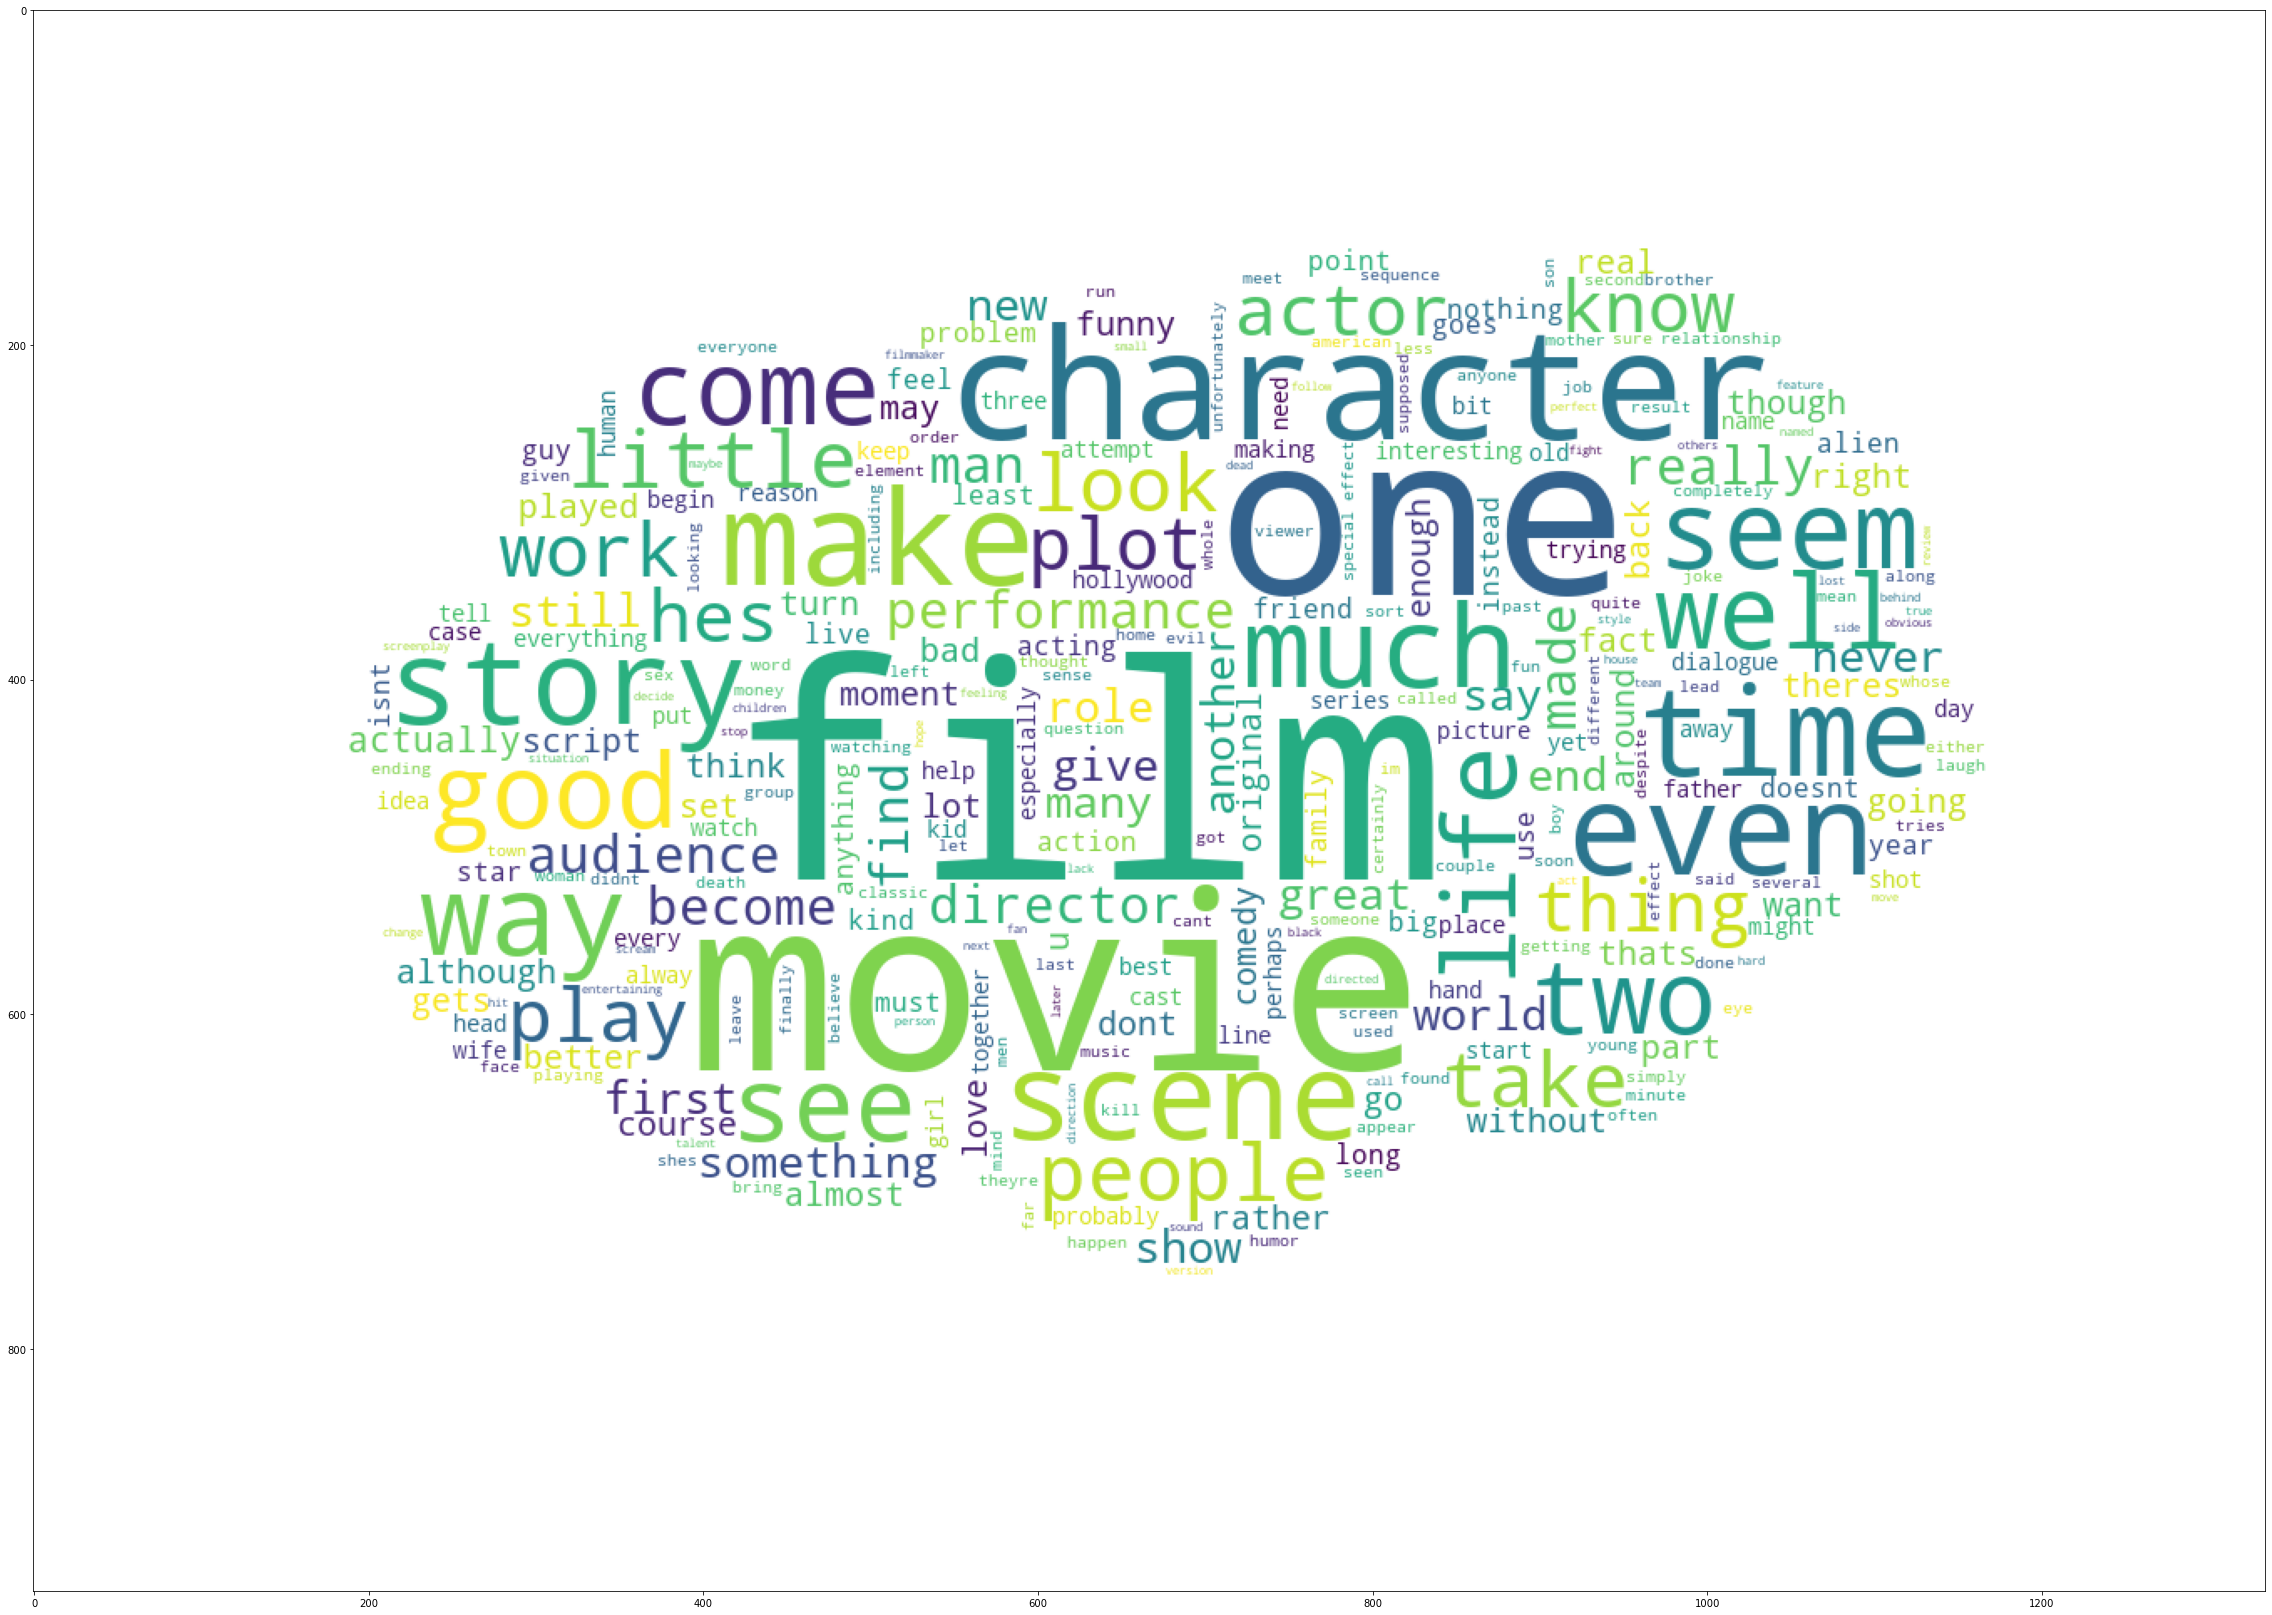

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = ''
for cmd in X['comment']:
    text += cmd
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(background_color="white",
                    max_words=300, 
                    mask=mask,)
wc.generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wc)

by observing the word cloud, it's not hard to find we have tons of word appear so frequently in our data set like 'movie' 'film' ... but these frequent words are not very helpful in classifing our data

# thats why we need a tf-idf vectorizer to lower the weight of word that appears so frequent

# Feature Creation

In [22]:
import nltk
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [23]:
X[0:5]['unigrams']

0    [plot, two, teen, couples, go, church, party, ...
1    [happy, bastards, quick, movie, review, damn, ...
2    [movies, like, make, jaded, movie, viewer, tha...
3    [quest, camelot, warner, bros, first, featurel...
4    [synopsis, mentally, unstable, man, undergoing...
Name: unigrams, dtype: object

In [24]:
X[0:5]

comment  type  category  \
0  plot two teen couples go church party drink dr...     0  negative   
1  happy bastards quick movie review damn bug got...     0  negative   
2  movies like make jaded movie viewer thankful i...     0  negative   
3  quest camelot warner bros first featurelength ...     0  negative   
4  synopsis mentally unstable man undergoing psyc...     0  negative   

                                            unigrams  
0  [plot, two, teen, couples, go, church, party, ...  
1  [happy, bastards, quick, movie, review, damn, ...  
2  [movies, like, make, jaded, movie, viewer, tha...  
3  [quest, camelot, warner, bros, first, featurel...  
4  [synopsis, mentally, unstable, man, undergoing...

In [25]:
list(X[0:1]['unigrams'])

[['plot',
  'two',
  'teen',
  'couples',
  'go',
  'church',
  'party',
  'drink',
  'drive',
  'get',
  'accident',
  'one',
  'guys',
  'dies',
  'girlfriend',
  'continues',
  'see',
  'life',
  'nightmares',
  'whats',
  'deal',
  'watch',
  'movie',
  'sorta',
  'find',
  'critique',
  'mindfuck',
  'movie',
  'teen',
  'generation',
  'touches',
  'cool',
  'idea',
  'presents',
  'bad',
  'package',
  'makes',
  'review',
  'even',
  'harder',
  'one',
  'write',
  'since',
  'generally',
  'applaud',
  'films',
  'attempt',
  'break',
  'mold',
  'mess',
  'head',
  'lost',
  'highway',
  'memento',
  'good',
  'bad',
  'ways',
  'making',
  'types',
  'films',
  'folks',
  'didnt',
  'snag',
  'one',
  'correctly',
  'seem',
  'taken',
  'pretty',
  'neat',
  'concept',
  'executed',
  'terribly',
  'problems',
  'movie',
  'well',
  'main',
  'problem',
  'simply',
  'jumbled',
  'starts',
  'normal',
  'downshifts',
  'fantasy',
  'world',
  'audience',
  'member',
  'idea'

split X into training set and testing set,and transform the comment in trainning set into trem frequency matirx

In [26]:
#split training and testing data set and use tf-idf vectorizer to get term frequency matirx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words = "english")
df_x = X["comment"]
df_y = X["type"]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

x_traincv = vectorizer.fit_transform(x_train)
x_testcv = vectorizer.transform(x_test)

In [27]:
x_traincv.shape

(1600, 42017)

In [28]:
vectorizer.get_feature_names()[0:20]

['aa',
 'aaa',
 'aaaaaaaaah',
 'aaaahhhs',
 'aahs',
 'aaliyah',
 'aaliyahs',
 'aalyah',
 'aalyahs',
 'aameetings',
 'aamir',
 'aardman',
 'aaron',
 'aatish',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons']

In [29]:
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()[0:20]]
plot_x

['term_aa',
 'term_aaa',
 'term_aaaaaaaaah',
 'term_aaaahhhs',
 'term_aahs',
 'term_aaliyah',
 'term_aaliyahs',
 'term_aalyah',
 'term_aalyahs',
 'term_aameetings',
 'term_aamir',
 'term_aardman',
 'term_aaron',
 'term_aatish',
 'term_aback',
 'term_abandon',
 'term_abandoned',
 'term_abandoning',
 'term_abandonment',
 'term_abandons']

In [30]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [31]:
plot_z = x_traincv[0:20, 0:20].toarray()
plot_z.shape

(20, 20)

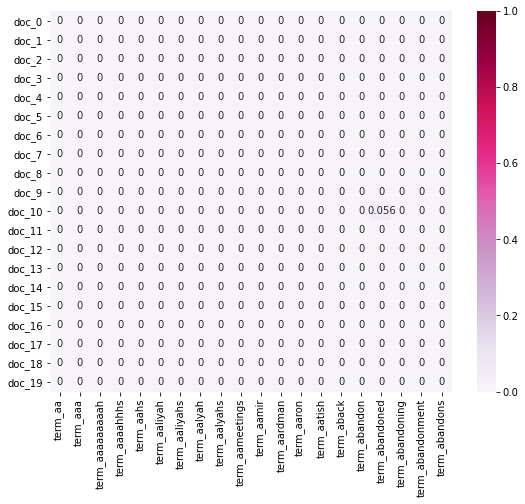

In [32]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [33]:
#try to find a denser area to plot
n = x_traincv.shape[0]
m = 5000 
boolean_x = np.zeros((n, m), dtype=int)
for i in range(n):
    for j in range(m):
        boolean_x[i,j] = 1 if x_traincv[i,j] else 0

integral = np.zeros((n, m), dtype=int)
#compute summed-area table
for i in range(1, n): integral[i,0] = integral[i-1,0]+boolean_x[i,0]
for j in range(1, m): integral[0,j] = integral[0,j-1]+boolean_x[0,j]
for i in range(1, n): 
    for j in range(1, m):
        integral[i,j] = boolean_x[i,j] + integral[i-1,j] + integral[i,j-1] - integral[i-1,j-1]


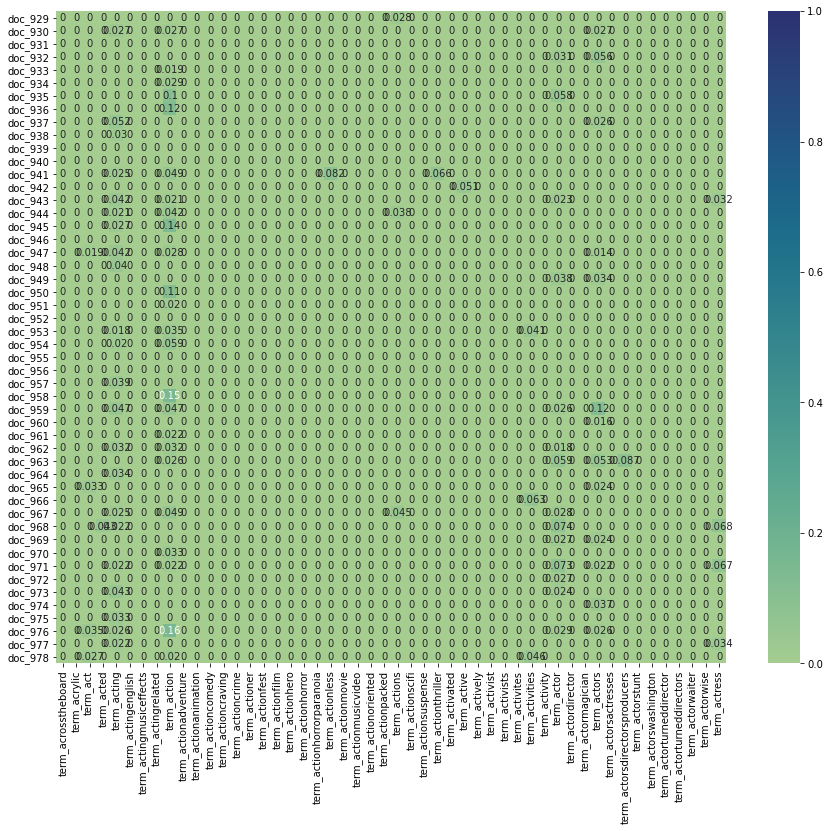

In [34]:
maxi = 0
top_r = 0 
top_c = 0
offset = 50
for r in range(n-offset):
    for c in range(m-offset):
        total_count = integral[r+offset-1,c+offset-1] - integral[r,c+offset-1] - integral[r+offset-1,c] + integral[r,c]
        if total_count > maxi:
            maxi = total_count
            top_r = r
            top_c = c 
#print(maxi)
#print(top_r, top_c)

plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names()[top_c : top_c+offset]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[top_r : top_r+offset]]
plot_z = x_traincv[top_r : top_r+offset, top_c : top_c+offset].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw,
                 cmap="crest",
                 vmin=0, vmax=1, annot=True)

# Dimensionality Reduction by PCA

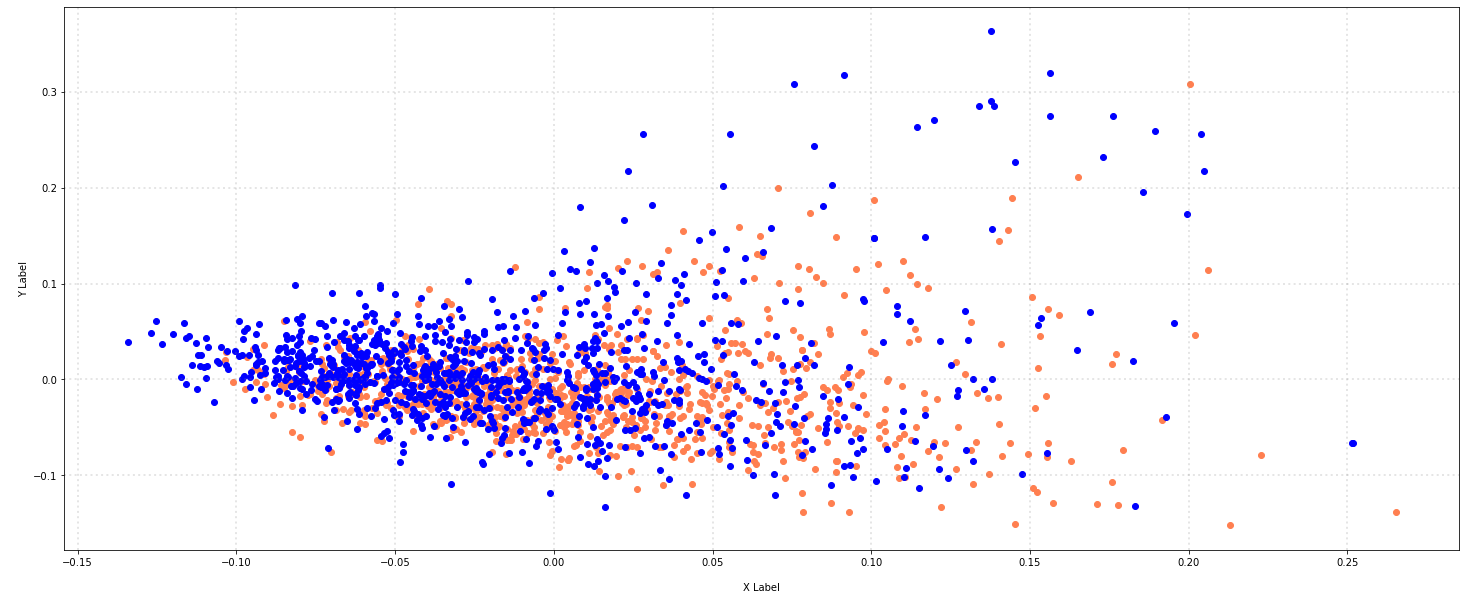

In [35]:
from sklearn.decomposition import PCA
vec = TfidfVectorizer(stop_words = "english")
X_counts = vec.fit_transform(X.comment)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# Atrribute Aggregation

In [36]:
term_frequencies = []
for j in range(0,x_traincv.shape[1]):
    term_frequencies.append(sum(x_traincv[:,j].toarray()))
len(term_frequencies)

42017

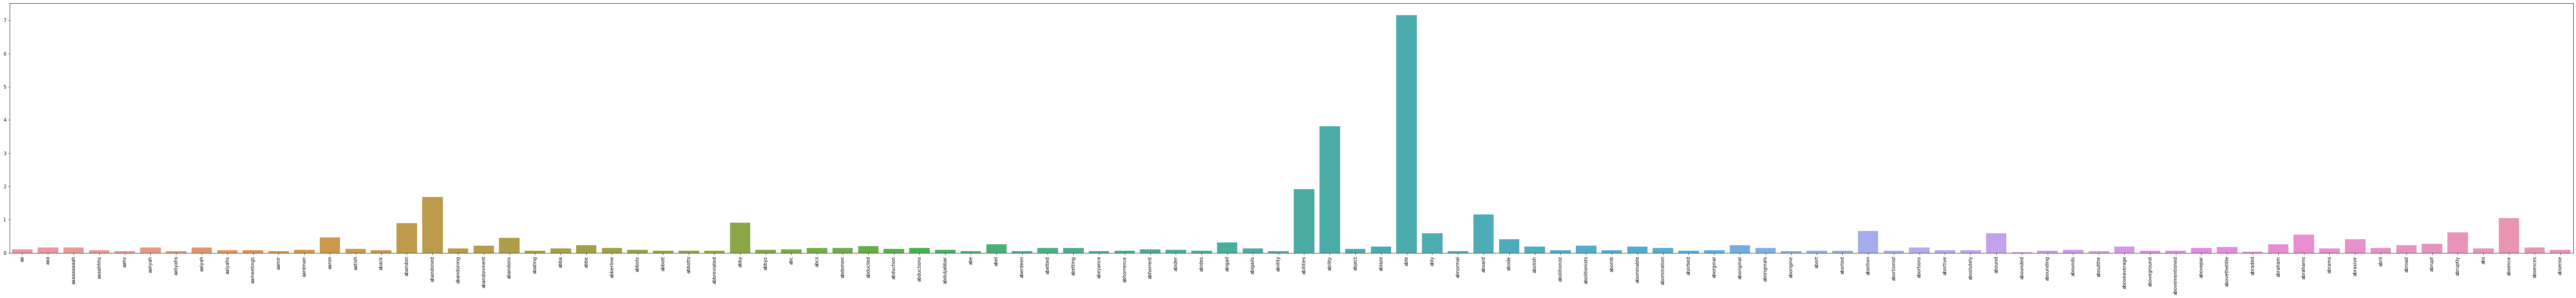

In [37]:
term_frequencies = np.asarray(x_traincv.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vectorizer.get_feature_names()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(vectorizer.get_feature_names()[:100], rotation = 90);

In [38]:
df = pd.DataFrame()
df['term'] = terms
df['count'] = term_frequencies
df = df.sort_values('count', ascending=False)[:1000]
threshold = sum(df['count'])*0.8
cnt = 0
split_idx = -1

for i in range(df.shape[0]):
    cnt += df.iloc[i]['count']
    if cnt > threshold:
        split_idx = i
        break

df_head = df.iloc[:split_idx, :]
df_tail = df.iloc[split_idx:, :]


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=df_head['term'], y=df_head['count'], name='head',
                marker_color='lime'))
fig.add_trace(go.Bar(x=df_tail['term'], y=df_tail['count'], name='tail',
                marker_color='yellow'))
fig.show()

NameError: name 'terms' is not defined

In [ ]:
import math
df['frequencies_log'] = df['count'].apply(math.log)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df['term'],
                y=df['frequencies_log'])
g.set_xticklabels(df['term'], rotation = 90);

# Fitting model and prediction

Before fitting a classification model, lets take a look at the weight of each term produce by our tf-idf vectorizer

In [ ]:
term_weight = np.asarray(x_traincv.mean(axis=0)).ravel().tolist()
term_array = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': term_weight})
term_array.sort_values(by='weight', ascending=False, inplace=True)
term_array

fit the MNB model and use it to predict the category of testing set
then we can caculate model accuracy

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv,y_train)
predictions = mnb.predict(x_testcv)
accurate = np.array(y_test)
count = 0
for i in range (len(predictions)):
    if predictions[i] == accurate[i]:
        count=count+1
        
print(count/len(accurate))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
C = confusion_matrix(predictions, y_test)
sn.set(font_scale=1.4)#for label size
sn.heatmap(C, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
plt.show()

# play around with  Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_

In [ ]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [ ]:
X

# Data Exploration

In [ ]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = vectorizer.transform(document_to_transform_1)
document_vector_count_2 = vectorizer.transform(document_to_transform_2)
document_vector_count_3 = vectorizer.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})